In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

happiness2015 = pd.read_csv('../dataset/World_Happiness_2015.csv')
first_5 = happiness2015.head()
happiness2015.info()

In [ ]:
# Using Loops to Aggregate Data

happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0, 10))
plt.show()

In [ ]:
happiness2015['Happiness Score'].plot(kind='barh', title='Happiness Scores', ylim=(0, 10))
plt.show()

In [ ]:
unique_regions = happiness2015['Region'].unique()
unique_regions

In [ ]:
so_asia = happiness2015[happiness2015['Region'] == 'Southeastern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))
plt.show()

In [ ]:
mean_happiness = {}
regions_group = happiness2015['Region'].unique()

for region in regions_group:
    region_group = happiness2015[happiness2015['Region'] == region]
    mean_happiness[region] = region_group['Happiness Score'].mean()
    

In [ ]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the DataFrame into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

In [ ]:
# Creating GroupBy Objects
grouped = happiness2015.groupby('Region')
grouped.get_group('Australia and New Zealand')

In [ ]:
# Exploring GroupBy Objects - groups attribute
print(grouped.groups)

# Filter on indices 8 and 9 in happiness2015
happiness2015.iloc[8:10] # its simillar -> grouped.get_group('Australia and New Zealand')


In [ ]:
north_america = happiness2015[happiness2015['Region'] == 'North America']
na_group = grouped.get_group('North America')
equal = (north_america == na_group)

In [ ]:
# Common Aggregation Methods with Groupby

grouped = happiness2015.groupby('Region')
means_grouped = grouped.mean()

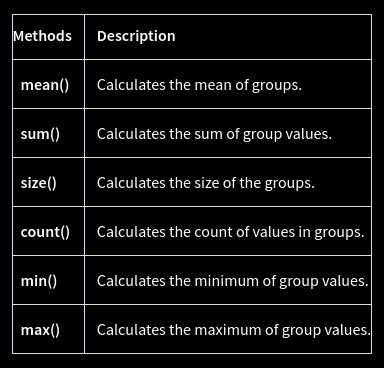

In [ ]:
# Aggregating Specific Columns with Groupby

grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean


In [ ]:
# Introduction to the Agg() Method

import numpy as np

grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())

happy_mean_max  = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

print(happy_mean_max)
print(mean_max_dif)

In [ ]:
# Computing Multiple and Custom Aggregations with the Agg() Method

import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])

# Performing the same procedure in a single line
happiness_means = happiness2015.groupby('Region')['Happiness Score'].agg(dif)

In [ ]:
# Aggregation with Pivot Tables
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

# Using GroupBy
# happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
pv_happiness

In [ ]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

In [ ]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

In [ ]:
# Aggregating Multiple Columns and Functions with Pivot Tables

grouped_by_region = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')
mean_min_max_by_region = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)
mean_min_max_by_region

In [ ]:
# Part 01 - Using GroupBy

grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

# Part 02 - Using Pivot_Table

pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)

pv_happy_family_stats
